#### Important libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [459]:
pip install xlsxwriter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [460]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import openpyxl
import xlsxwriter

#### Reading csv file

In [4]:
#reading the csv file
df = pd.read_csv(r'Calls.csv')
gender = pd.read_csv('Gender.csv')
job = pd.read_csv('Jobs.csv')
marital = pd.read_csv('Marital.csv')
region = pd.read_csv('Regions.csv')
call_result = pd.read_csv('Call_result.csv')
employees = pd.read_csv('Employee.csv')
df.head()

,Call_date,Call_id,call_type,Job_id,Response_time,birth_date,Marital_status,Gender,Region_id,Employee_id,Call_result
0,1/10/2024,2406,Cold,3,NaN,15 1988 8,2.0,0,2,3,0
1,1/22/2024,2892,Cold,3,NaN,24 1990 6,1.0,0,3,5,0
2,1/23/2024,2788,Cold,3,NaN,30 1978 8,2.0,0,2,1,1
3,1/2/2024,2663,Hot,3,1039.0,18 1983 6,1.0,1,1,5,1
4,1/8/2024,2498,Cold,3,NaN,16 1975 10,2.0,1,4,4,0


#### Data Cleaning

##### Old Data Frame

In [5]:
df.isnull().sum()
#There are null values in Marital Status and Response time columns

Call_date           0
Call_id             0
call_type           0
Job_id              0
Response_time     695
birth_date          0
Marital_status     24
Gender              0
Region_id           0
Employee_id         0
Call_result         0
dtype: int64

In [6]:
df.shape

(1106, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Call_date       1106 non-null   object 
 1   Call_id         1106 non-null   int64  
 2   call_type       1106 non-null   object 
 3   Job_id          1106 non-null   int64  
 4   Response_time   411 non-null    float64
 5   birth_date      1106 non-null   object 
 6   Marital_status  1082 non-null   float64
 7   Gender          1106 non-null   int64  
 8   Region_id       1106 non-null   int64  
 9   Employee_id     1106 non-null   int64  
 10  Call_result     1106 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 95.2+ KB


**Birth date and call_date column needs to be converted to date data type**

In [8]:
df['birth_date'] = df['birth_date'].apply(lambda x : x.split()[1]+'/'+x.split()[2]+'/'+x.split()[0])
df.head()

,Call_date,Call_id,call_type,Job_id,Response_time,birth_date,Marital_status,Gender,Region_id,Employee_id,Call_result
0,1/10/2024,2406,Cold,3,NaN,1988/8/15,2.0,0,2,3,0
1,1/22/2024,2892,Cold,3,NaN,1990/6/24,1.0,0,3,5,0
2,1/23/2024,2788,Cold,3,NaN,1978/8/30,2.0,0,2,1,1
3,1/2/2024,2663,Hot,3,1039.0,1983/6/18,1.0,1,1,5,1
4,1/8/2024,2498,Cold,3,NaN,1975/10/16,2.0,1,4,4,0


In [9]:
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['Call_date'] = pd.to_datetime(df['Call_date'])

In [10]:
df.head()

,Call_date,Call_id,call_type,Job_id,Response_time,birth_date,Marital_status,Gender,Region_id,Employee_id,Call_result
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,0
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,0
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,1
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,1
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Call_date       1106 non-null   datetime64[ns]
 1   Call_id         1106 non-null   int64         
 2   call_type       1106 non-null   object        
 3   Job_id          1106 non-null   int64         
 4   Response_time   411 non-null    float64       
 5   birth_date      1106 non-null   datetime64[ns]
 6   Marital_status  1082 non-null   float64       
 7   Gender          1106 non-null   int64         
 8   Region_id       1106 non-null   int64         
 9   Employee_id     1106 non-null   int64         
 10  Call_result     1106 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 95.2+ KB


**For future analysis we can extract year and customer_age from birth date column and create new columns**

In [12]:
from datetime import date

In [13]:
current_date = date.today()
current_year = current_date.strftime("%Y")

In [14]:
df['customer_birth_year'] = df['birth_date'].apply(lambda x:x.year)
df['customer_age'] = int(current_year) - df['customer_birth_year']

In [15]:
df.head()

,Call_date,Call_id,call_type,Job_id,Response_time,birth_date,Marital_status,Gender,Region_id,Employee_id,Call_result,customer_birth_year,customer_age
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,0,1988,36
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,0,1990,34
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,1,1978,46
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,1,1983,41
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,0,1975,49


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Call_date            1106 non-null   datetime64[ns]
 1   Call_id              1106 non-null   int64         
 2   call_type            1106 non-null   object        
 3   Job_id               1106 non-null   int64         
 4   Response_time        411 non-null    float64       
 5   birth_date           1106 non-null   datetime64[ns]
 6   Marital_status       1082 non-null   float64       
 7   Gender               1106 non-null   int64         
 8   Region_id            1106 non-null   int64         
 9   Employee_id          1106 non-null   int64         
 10  Call_result          1106 non-null   int64         
 11  customer_birth_year  1106 non-null   int64         
 12  customer_age         1106 non-null   int64         
dtypes: datetime64[ns](2), float64(2),

##### Deleting duplicates

In [17]:
df.isnull().sum()

Call_date                0
Call_id                  0
call_type                0
Job_id                   0
Response_time          695
birth_date               0
Marital_status          24
Gender                   0
Region_id                0
Employee_id              0
Call_result              0
customer_birth_year      0
customer_age             0
dtype: int64

In [18]:
df = df.drop_duplicates(subset=['Call_id'])

In [19]:
df.shape

(1031, 13)

*Converting all column names to lowercase*

In [20]:
old_columns = list(df.columns)

In [21]:
new_columns = list(map(lambda x:x.lower(),old_columns))

In [22]:
rename_dict = {old_column:new_column for old_column,new_column in zip(old_columns,new_columns)}
rename_dict

{'Call_date': 'call_date',
 'Call_id': 'call_id',
 'call_type': 'call_type',
 'Job_id': 'job_id',
 'Response_time': 'response_time',
 'birth_date': 'birth_date',
 'Marital_status': 'marital_status',
 'Gender': 'gender',
 'Region_id': 'region_id',
 'Employee_id': 'employee_id',
 'Call_result': 'call_result',
 'customer_birth_year': 'customer_birth_year',
 'customer_age': 'customer_age'}

In [23]:
df.rename(columns=rename_dict,inplace=True)

In [24]:
df.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,marital_status,gender,region_id,employee_id,call_result,customer_birth_year,customer_age
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,0,1988,36
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,0,1990,34
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,1,1978,46
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,1,1983,41
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,0,1975,49


##### Handling Missing Values

In [25]:
# Defining age intervals
bins = [15, 30, 40, 50, 70]
labels = ['15-30', '31-40', '41-50', '51-70']
df['age_interval'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

##### Handling Missing Values

In [26]:
df.isnull().sum()

call_date                0
call_id                  0
call_type                0
job_id                   0
response_time          648
birth_date               0
marital_status          23
gender                   0
region_id                0
employee_id              0
call_result              0
customer_birth_year      0
customer_age             0
age_interval             0
dtype: int64

In [27]:
# Finding the most frequent marital status for each age interval and gender group
most_frequent_marital_status = df.groupby(['age_interval', 'gender'])['marital_status'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Mapping the most frequent marital status to the DataFrame
df['most_frequent_marital_status'] = df.set_index(['age_interval', 'gender']).index.map(most_frequent_marital_status)

# Filling null values in marital_status with the most frequent marital status per age interval and gender
df['marital_status'].fillna(df['most_frequent_marital_status'], inplace=True)

C:\Users\zeyne\AppData\Local\Temp\ipykernel_14728\96633303.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_frequent_marital_status = df.groupby(['age_interval', 'gender'])['marital_status'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
C:\Users\zeyne\AppData\Local\Temp\ipykernel_14728\96633303.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operatio

In [28]:
# Drop the helper column
df.drop(columns=['most_frequent_marital_status'], inplace=True)

In [29]:
df.isnull().sum()

call_date                0
call_id                  0
call_type                0
job_id                   0
response_time          648
birth_date               0
marital_status           0
gender                   0
region_id                0
employee_id              0
call_result              0
customer_birth_year      0
customer_age             0
age_interval             0
dtype: int64

In [30]:
df.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,marital_status,gender,region_id,employee_id,call_result,customer_birth_year,customer_age,age_interval
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,0,1988,36,31-40
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,0,1990,34,31-40
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,1,1978,46,41-50
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,1,1983,41,41-50
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,0,1975,49,41-50


<Axes: xlabel='marital_status'>

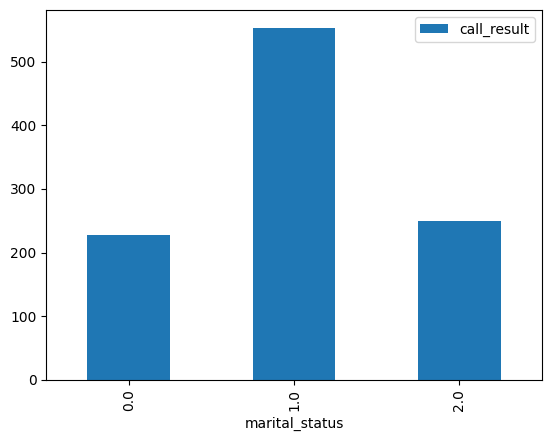

In [31]:
pd.DataFrame(df['call_result'].groupby(df['marital_status']).count()).plot(kind='bar')

##### New DataFrame

In [32]:
gender

,gender_id,gender_name
0,0,Man
1,1,Woman


In [33]:
# NEW DATAFRAME
df.rename({'gender':'gender_id'},axis=1,inplace=True)

In [34]:
df = pd.merge(df,gender,on='gender_id')

In [35]:
marital

,status_id,status
0,0,Single
1,1,Married
2,2,Divorced


In [36]:
df.rename({'marital_status':'status_id'},axis=1,inplace=True)

In [37]:
marital.rename({'status':'marital_status'},axis=1,inplace=True)

In [38]:
df = pd.merge(df,marital,on='status_id')

In [39]:
region

,region_id,region_name
0,1,Baku-Absheron
1,2,Sumgayit
2,3,Ganja
3,4,Nakhcivan
4,5,Lankaran
5,6,Shaki


In [40]:
df = pd.merge(df,region,on='region_id')

In [41]:
job

,job_id,job_field
0,1,Private sector
1,2,Oil industry
2,3,Military
3,4,Teacher
4,5,Unemployed


In [42]:
df = pd.merge(df,job,on='job_id')

In [43]:
call_result

,call_result_id,result
0,0,Unsuccessful
1,1,Successful


In [44]:
df.rename({'call_result':'call_result_id'},axis=1,inplace=True)
call_result.rename({'result':'call_result'},axis=1,inplace=True)

In [45]:
df = pd.merge(df,call_result,on='call_result_id')

In [46]:
employees

,employee_id,employee_name,hired_date
0,1,Fuad Aliyev,7/15/2017
1,2,Orkhan Asgarov,12/18/2017
2,3,Elmir Mustafayev,1/5/2018
3,4,Fidan Mammadli,1/12/2018
4,5,Rashad Huseynli,6/6/2018
5,6,Elchin Asgarov,2/5/2019
6,7,Seymur Huseynov,3/4/2020
7,8,Emin Ahmedov,9/8/2022
8,9,Lamiya Hajiyeva,10/2/2023
9,10,Rufat Huseynov,10/1/2024


In [47]:
df = pd.merge(df,employees,on='employee_id')

In [48]:
df.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,...,customer_birth_year,customer_age,age_interval,gender_name,marital_status,region_name,job_field,call_result,employee_name,hired_date
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,...,1988,36,31-40,Man,Divorced,Sumgayit,Military,Unsuccessful,Elmir Mustafayev,1/5/2018
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,...,1990,34,31-40,Man,Married,Ganja,Military,Unsuccessful,Rashad Huseynli,6/6/2018
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,...,1978,46,41-50,Man,Divorced,Sumgayit,Military,Successful,Fuad Aliyev,7/15/2017
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,...,1983,41,41-50,Woman,Married,Baku-Absheron,Military,Successful,Rashad Huseynli,6/6/2018
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,...,1975,49,41-50,Woman,Divorced,Nakhcivan,Military,Unsuccessful,Fidan Mammadli,1/12/2018


In [49]:
telesales = df.copy()

In [50]:
telesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   call_date            1031 non-null   datetime64[ns]
 1   call_id              1031 non-null   int64         
 2   call_type            1031 non-null   object        
 3   job_id               1031 non-null   int64         
 4   response_time        383 non-null    float64       
 5   birth_date           1031 non-null   datetime64[ns]
 6   status_id            1031 non-null   float64       
 7   gender_id            1031 non-null   int64         
 8   region_id            1031 non-null   int64         
 9   employee_id          1031 non-null   int64         
 10  call_result_id       1031 non-null   int64         
 11  customer_birth_year  1031 non-null   int64         
 12  customer_age         1031 non-null   int64         
 13  age_interval         1031 non-nul

**Hired_date columns need to be converted to date type**

In [51]:
telesales['hired_date'] = pd.to_datetime(telesales['hired_date'])

In [52]:
telesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   call_date            1031 non-null   datetime64[ns]
 1   call_id              1031 non-null   int64         
 2   call_type            1031 non-null   object        
 3   job_id               1031 non-null   int64         
 4   response_time        383 non-null    float64       
 5   birth_date           1031 non-null   datetime64[ns]
 6   status_id            1031 non-null   float64       
 7   gender_id            1031 non-null   int64         
 8   region_id            1031 non-null   int64         
 9   employee_id          1031 non-null   int64         
 10  call_result_id       1031 non-null   int64         
 11  customer_birth_year  1031 non-null   int64         
 12  customer_age         1031 non-null   int64         
 13  age_interval         1031 non-nul

In [53]:
telesales.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,...,customer_birth_year,customer_age,age_interval,gender_name,marital_status,region_name,job_field,call_result,employee_name,hired_date
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,...,1988,36,31-40,Man,Divorced,Sumgayit,Military,Unsuccessful,Elmir Mustafayev,2018-01-05
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,...,1990,34,31-40,Man,Married,Ganja,Military,Unsuccessful,Rashad Huseynli,2018-06-06
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,...,1978,46,41-50,Man,Divorced,Sumgayit,Military,Successful,Fuad Aliyev,2017-07-15
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,...,1983,41,41-50,Woman,Married,Baku-Absheron,Military,Successful,Rashad Huseynli,2018-06-06
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,...,1975,49,41-50,Woman,Divorced,Nakhcivan,Military,Unsuccessful,Fidan Mammadli,2018-01-12


In [54]:
telesales.isnull().sum()

call_date                0
call_id                  0
call_type                0
job_id                   0
response_time          648
birth_date               0
status_id                0
gender_id                0
region_id                0
employee_id              0
call_result_id           0
customer_birth_year      0
customer_age             0
age_interval             0
gender_name              0
marital_status           0
region_name              0
job_field                0
call_result              0
employee_name            0
hired_date               0
dtype: int64

#### Data Exploring

In [55]:
telesales.describe()

,call_date,call_id,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,call_result_id,customer_birth_year,customer_age,hired_date
count,1031,1031.000000,1031.000000,383.000000,1031,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031
mean,2024-01-16 14:25:57.322987520,2516.000000,3.109602,465.997389,1984-09-20 01:26:35.732298752,1.022308,0.391853,2.388943,3.416101,0.338506,1984.230844,39.769156,2018-06-15 11:00:38.409311232
min,2024-01-01 00:00:00,2001.000000,1.000000,1.000000,1958-10-09 00:00:00,0.000000,0.000000,1.000000,1.000000,0.000000,1958.000000,16.000000,2017-07-15 00:00:00
25%,2024-01-09 00:00:00,2258.500000,2.000000,56.000000,1978-07-18 00:00:00,1.000000,0.000000,1.000000,2.000000,0.000000,1978.000000,33.000000,2017-12-18 00:00:00
50%,2024-01-16 00:00:00,2516.000000,3.000000,106.000000,1984-04-27 00:00:00,1.000000,0.000000,2.000000,3.000000,0.000000,1984.000000,40.000000,2018-01-05 00:00:00
75%,2024-01-23 00:00:00,2773.500000,4.000000,883.500000,1991-07-22 00:00:00,1.000000,1.000000,3.000000,5.000000,1.000000,1991.000000,46.000000,2018-06-06 00:00:00
max,2024-01-31 00:00:00,3031.000000,5.000000,1993.000000,2008-03-16 00:00:00,2.000000,1.000000,6.000000,10.000000,1.000000,2008.000000,66.000000,2024-10-01 00:00:00
std,NaN,297.768366,1.365531,578.144167,NaN,0.680153,0.488401,1.385442,2.245274,0.473431,8.947802,8.947802,NaN


<Axes: ylabel='Frequency'>

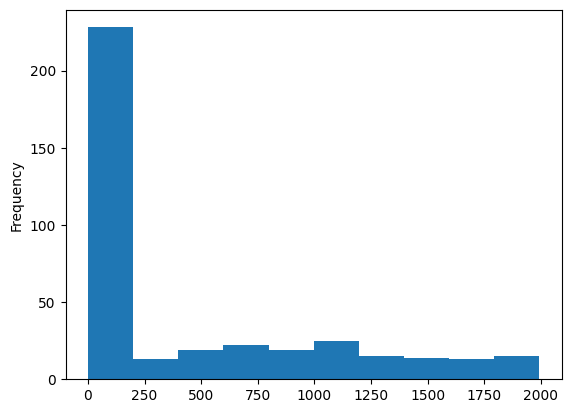

In [56]:
telesales['response_time'].plot(kind='hist')

<Axes: >

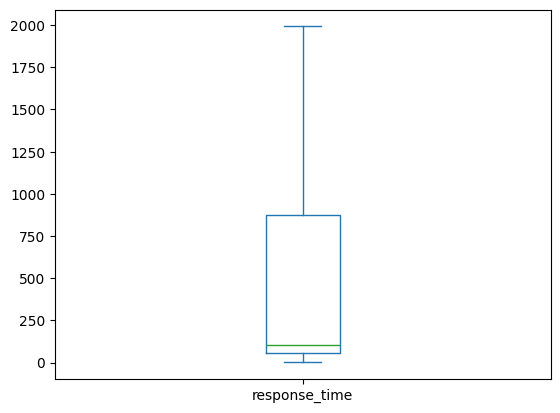

In [54]:
telesales['response_time'].plot(kind='box')

<Axes: ylabel='Frequency'>

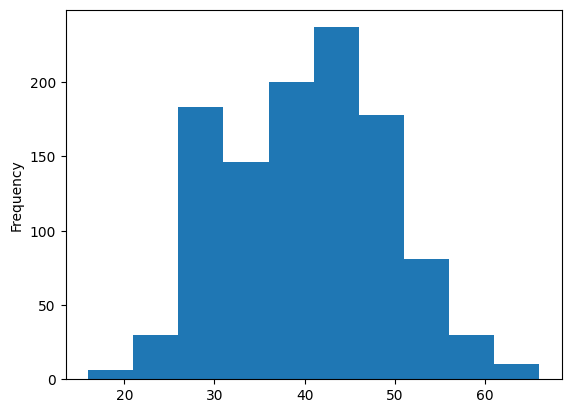

In [55]:
telesales['customer_age'].plot(kind='hist')

<Axes: >

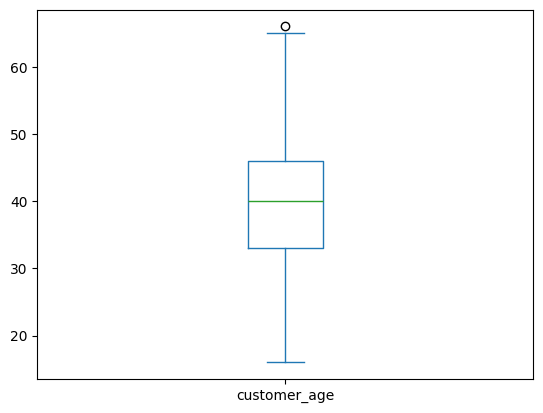

In [56]:
telesales['customer_age'].plot(kind='box')

In [57]:
telesales.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,...,customer_birth_year,customer_age,age_interval,gender_name,marital_status,region_name,job_field,call_result,employee_name,hired_date
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,...,1988,36,31-40,Man,Divorced,Sumgayit,Military,Unsuccessful,Elmir Mustafayev,2018-01-05
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,...,1990,34,31-40,Man,Married,Ganja,Military,Unsuccessful,Rashad Huseynli,2018-06-06
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,...,1978,46,41-50,Man,Divorced,Sumgayit,Military,Successful,Fuad Aliyev,2017-07-15
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,...,1983,41,41-50,Woman,Married,Baku-Absheron,Military,Successful,Rashad Huseynli,2018-06-06
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,...,1975,49,41-50,Woman,Divorced,Nakhcivan,Military,Unsuccessful,Fidan Mammadli,2018-01-12


In [58]:
telesales.corr(numeric_only=True)

,call_id,job_id,response_time,status_id,gender_id,region_id,employee_id,call_result_id,customer_birth_year,customer_age
call_id,1.000000,0.021804,-0.060934,0.024788,-0.032220,-0.039076,-0.023154,0.045476,0.016976,-0.016976
job_id,0.021804,1.000000,0.018705,-0.012373,0.007690,-0.057037,0.023478,-0.320868,-0.042044,0.042044
response_time,-0.060934,0.018705,1.000000,0.017493,-0.028950,-0.084999,0.002090,-0.422448,-0.009785,0.009785
status_id,0.024788,-0.012373,0.017493,1.000000,0.007873,-0.049992,-0.000139,0.061323,-0.449456,0.449456
gender_id,-0.032220,0.007690,-0.028950,0.007873,1.000000,-0.003701,0.043397,0.155562,0.004706,-0.004706
region_id,-0.039076,-0.057037,-0.084999,-0.049992,-0.003701,1.000000,0.029844,-0.195973,0.024636,-0.024636
employee_id,-0.023154,0.023478,0.002090,-0.000139,0.043397,0.029844,1.000000,-0.094079,0.007744,-0.007744
call_result_id,0.045476,-0.320868,-0.422448,0.061323,0.155562,-0.195973,-0.094079,1.000000,-0.059983,0.059983
customer_birth_year,0.016976,-0.042044,-0.009785,-0.449456,0.004706,0.024636,0.007744,-0.059983,1.000000,-1.000000
customer_age,-0.016976,0.042044,0.009785,0.449456,-0.004706,-0.024636,-0.007744,0.059983,-1.000000,1.000000


In [59]:
telesales.to_csv('telesales_final.csv',index=False)

#### Data Analysis

##### Understanding the Problem

**Even though the number of cold calls is greater than the number of hot calls, hot calls have more success rate**

<Axes: xlabel='call_type'>

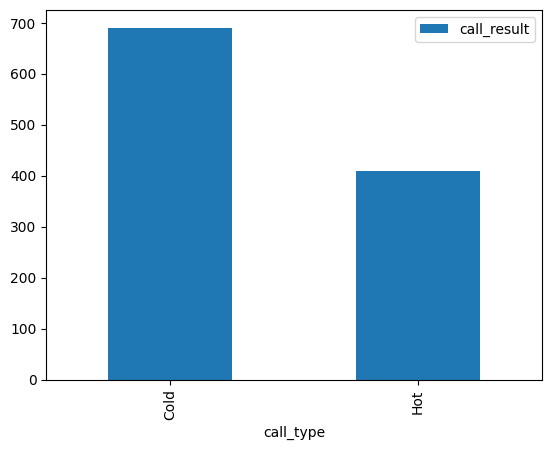

In [60]:
pd.DataFrame(telesales['call_result'].groupby(telesales['call_type']).count()).plot(kind='bar')
# Proportion of call types in the dataset

In [61]:
telesales['call_result'].groupby(telesales['call_type']).count()

call_type
Cold    691
Hot     410
Name: call_result, dtype: int64

<Axes: xlabel='call_type'>

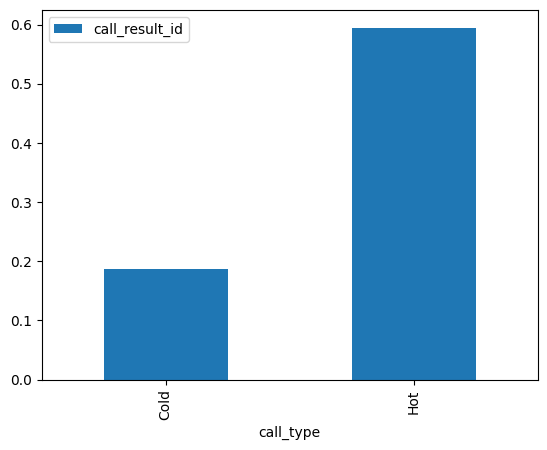

In [62]:
pd.DataFrame(telesales['call_result_id'].groupby(telesales['call_type']).mean()).plot(kind='bar')
# Successfull call results of call types

In [63]:
telesales['call_result_id'].groupby(telesales['call_type']).mean()*100

call_type
Cold    18.668596
Hot     59.512195
Name: call_result_id, dtype: float64

##### Hypoteses 1 : Younger Customers Are More Responsive to Telesales

In [64]:
telesales.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,...,customer_birth_year,customer_age,age_interval,gender_name,marital_status,region_name,job_field,call_result,employee_name,hired_date
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,...,1988,36,31-40,Man,Divorced,Sumgayit,Military,Unsuccessful,Elmir Mustafayev,2018-01-05
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,...,1990,34,31-40,Man,Married,Ganja,Military,Unsuccessful,Rashad Huseynli,2018-06-06
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,...,1978,46,41-50,Man,Divorced,Sumgayit,Military,Successful,Fuad Aliyev,2017-07-15
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,...,1983,41,41-50,Woman,Married,Baku-Absheron,Military,Successful,Rashad Huseynli,2018-06-06
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,...,1975,49,41-50,Woman,Divorced,Nakhcivan,Military,Unsuccessful,Fidan Mammadli,2018-01-12


In [65]:
telesales_copy =  telesales.copy()

C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2891470835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(telesales['call_result_id'].groupby(telesales['age_interval']).mean()*100).plot(kind='bar')


<Axes: xlabel='age_interval'>

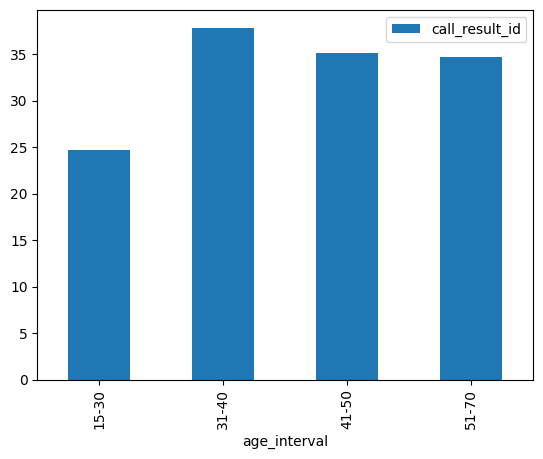

In [66]:
pd.DataFrame(telesales['call_result_id'].groupby(telesales['age_interval']).mean()*100).plot(kind='bar')
# We can see that younger customers are not more interested in our products

<Axes: ylabel='Frequency'>

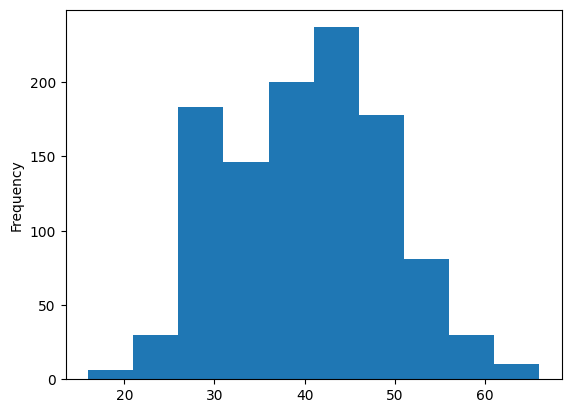

In [67]:
telesales['customer_age'].plot(kind='hist')

In [68]:
telesales['call_result_id'].groupby(telesales['age_interval']).mean()*100

C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\232323714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  telesales['call_result_id'].groupby(telesales['age_interval']).mean()*100


age_interval
15-30    24.657534
31-40    37.861272
41-50    35.180723
51-70    34.710744
Name: call_result_id, dtype: float64

<Axes: xlabel='customer_age'>

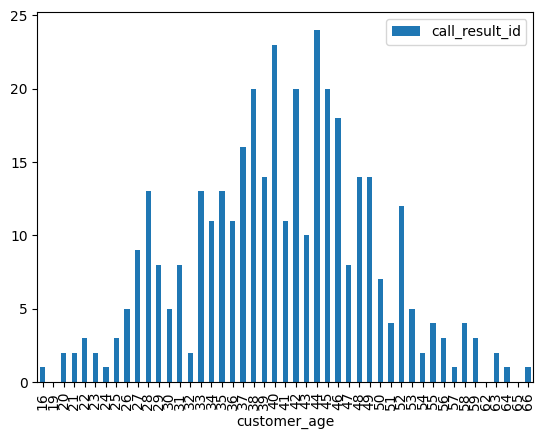

In [70]:
pd.DataFrame(telesales['call_result_id'].groupby(telesales['customer_age']).sum()).plot(kind='bar')

* P-value is less than 0.05. It means the observed difference in succesfull calls among age intervals is statistically significant
*  Younger Customers Are Not More Responsive to Telesales

##### Hypothesis 2 : Customer Demographics Influence Call Success

In [71]:
telesales.head()

,call_date,call_id,call_type,job_id,response_time,birth_date,status_id,gender_id,region_id,employee_id,...,customer_birth_year,customer_age,age_interval,gender_name,marital_status,region_name,job_field,call_result,employee_name,hired_date
0,2024-01-10,2406,Cold,3,NaN,1988-08-15,2.0,0,2,3,...,1988,36,31-40,Man,Divorced,Sumgayit,Military,Unsuccessful,Elmir Mustafayev,2018-01-05
1,2024-01-22,2892,Cold,3,NaN,1990-06-24,1.0,0,3,5,...,1990,34,31-40,Man,Married,Ganja,Military,Unsuccessful,Rashad Huseynli,2018-06-06
2,2024-01-23,2788,Cold,3,NaN,1978-08-30,2.0,0,2,1,...,1978,46,41-50,Man,Divorced,Sumgayit,Military,Successful,Fuad Aliyev,2017-07-15
3,2024-01-02,2663,Hot,3,1039.0,1983-06-18,1.0,1,1,5,...,1983,41,41-50,Woman,Married,Baku-Absheron,Military,Successful,Rashad Huseynli,2018-06-06
4,2024-01-08,2498,Cold,3,NaN,1975-10-16,2.0,1,4,4,...,1975,49,41-50,Woman,Divorced,Nakhcivan,Military,Unsuccessful,Fidan Mammadli,2018-01-12


In [73]:
telesales['call_result_id'].groupby(telesales['gender_name']).mean()*100
# We can see that women are more interested in our products. But It can happen by chance, we need to perform chi-square test.

gender_name
Man      27.927928
Woman    42.988506
Name: call_result_id, dtype: float64

In [74]:
succes_by_gender = pd.DataFrame(telesales['call_result_id'].groupby(telesales['gender_name']).sum()).reset_index()
succes_by_gender

,gender_name,call_result_id
0,Man,186
1,Woman,187


In [76]:
unsucces_by_gender = pd.DataFrame(telesales['call_result_id'].groupby(telesales['gender_name']).count() - telesales['call_result_id'].groupby(telesales['gender_name']).sum()).reset_index()
unsucces_by_gender

,gender_name,call_result_id
0,Man,480
1,Woman,248


In [77]:
stat_test_gender = pd.concat([succes_by_gender,unsucces_by_gender])
stat_test_gender['succes'] = 0
stat_test_gender['succes'][:2] = 1
stat_test_gender

C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2191212201.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stat_test_gender['succes'][:2] = 1
C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2191212201.py:3: SettingWithCopyWarning: 
A

,gender_name,call_result_id,succes
0,Man,186,1
1,Woman,187,1
0,Man,480,0
1,Woman,248,0


In [79]:
stat_test_gender_pivot=pd.pivot_table(stat_test_gender, columns='gender_name',values='call_result_id',index='succes')
stat_test_gender_pivot

gender_name,Man,Woman
succes,,
0,480.0,248.0
1,186.0,187.0


In [80]:
pvalue = stats.chi2_contingency(stat_test_gender_pivot).pvalue
print(f'P-value : {pvalue:.14f}')

P-value : 0.00000034576343


* P-value is less than 0.05. There is significant difference between men and women call succes rate.
* Women are more interested in our products.

##### Hypothesis 3 : Customers with Similar Marital Statuses Show Different Response Patterns

<Axes: xlabel='marital_status'>

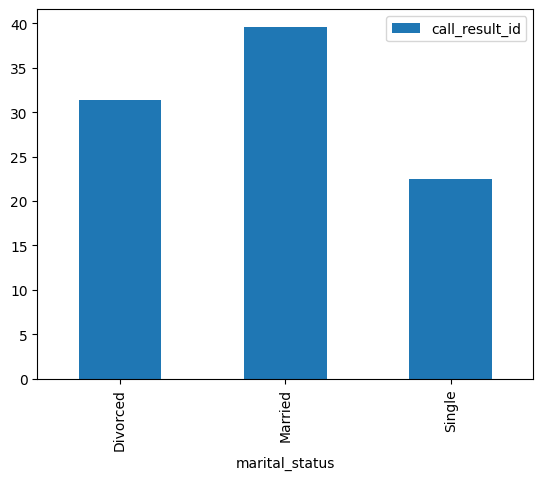

In [81]:
pd.DataFrame((telesales['call_result_id'].groupby(telesales['marital_status']).sum()/telesales['call_result_id'].groupby(telesales['marital_status']).count())*100).plot(kind='bar')
# Married people are more interested in products. Let's perform a chi-square test to see that whether the call succes difference among various marital statuses is significant.

In [83]:
succes_by_marital = pd.DataFrame(telesales['call_result_id'].groupby(telesales['marital_status']).sum()).reset_index()
unsucces_by_marital = pd.DataFrame(telesales['call_result_id'].groupby(telesales['marital_status']).count() - telesales['call_result_id'].groupby(telesales['marital_status']).sum()).reset_index()
marital_test = pd.concat([succes_by_marital,unsucces_by_marital])
marital_test['succes'] = 0
marital_test['succes'][:3] = 1
marital_test

C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2620868890.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  marital_test['succes'][:3] = 1
C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2620868890.py:5: SettingWithCopyWarning: 
A val

,marital_status,call_result_id,succes
0,Divorced,81,1
1,Married,237,1
2,Single,55,1
0,Divorced,177,0
1,Married,361,0
2,Single,190,0


In [ ]:
marital_pivot = pd.pivot_table(marital_test, columns='marital_status',index='succes',values='call_result_id')
marital_pivot

marital_status,Divorced,Married,Single
succes,,,
0,177.0,361.0,190.0
1,81.0,237.0,55.0


In [85]:
pvalue = stats.chi2_contingency(marital_pivot).pvalue
print(f'P-value : {pvalue :.12f}')

P-value : 0.000006672930


* P-value is less than 0.05, there is a significant difference between call succes rates by marital status.
* Married people show more interest in our products.

##### Hypothesis 4 : Faster Response Times Lead to Higher Conversion Rates

In [57]:
hot_calls = telesales.loc[telesales['call_type']=='Hot'][['call_id','call_type','response_time','call_result_id','employee_name','hired_date','age_interval','gender_name']]
hot_calls

,call_id,call_type,response_time,call_result_id,employee_name,hired_date,age_interval,gender_name
3,2663,Hot,1039.0,1,Rashad Huseynli,2018-06-06,41-50,Woman
5,3008,Hot,35.0,1,Elchin Asgarov,2019-02-05,15-30,Man
11,2622,Hot,87.0,0,Orkhan Asgarov,2017-12-18,41-50,Man
12,2657,Hot,17.0,1,Fidan Mammadli,2018-01-12,41-50,Man
20,2908,Hot,1132.0,0,Orkhan Asgarov,2017-12-18,41-50,Woman
...,...,...,...,...,...,...,...,...
1022,2038,Hot,86.0,0,Fuad Aliyev,2017-07-15,31-40,Woman
1025,2262,Hot,19.0,1,Orkhan Asgarov,2017-12-18,41-50,Woman
1027,2835,Hot,56.0,1,Fuad Aliyev,2017-07-15,41-50,Man
1029,2698,Hot,691.0,1,Emin Ahmedov,2022-09-08,41-50,Woman


<Axes: ylabel='Frequency'>

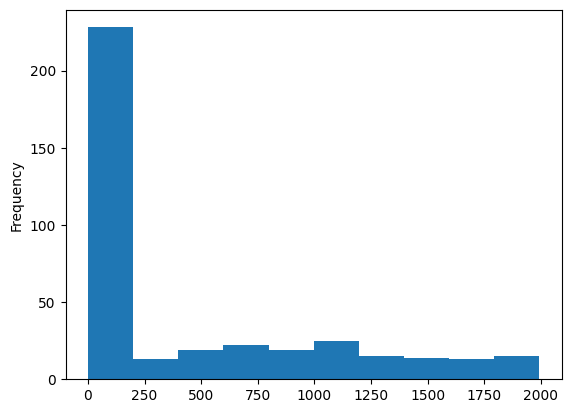

In [ ]:
telesales['response_time'].plot(kind='hist')

In [ ]:
bins = [0, 50, 100, 150, 400,  650, 900, 1150, 1400,1650,2000]
labels = ['0-50', '51-100', '101-150', '151-400', '401-650', '651-900', '901-1150', '1151-1400','1401-1650','1651-2000']
telesales['response_time_interval'] = pd.cut(telesales['response_time'], bins=bins, labels=labels)

In [ ]:
hot_calls['response_time_interval'] = pd.cut(hot_calls['response_time'], bins=bins, labels=labels)


C:\Users\zeyne\AppData\Local\Temp\ipykernel_20732\3491385643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['response_time_interval'],sort=True).sum()).plot(kind='bar')


<Axes: xlabel='response_time_interval'>

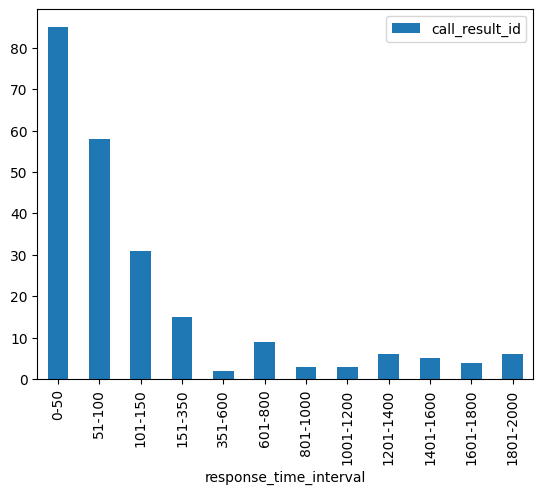

In [70]:
pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['response_time_interval'],sort=True).sum()).plot(kind='bar')
# We can see that while age interval is increasing, call succes rate is decreasing. Seems that there is a relationship between them, but we need to perform statistical test.

C:\Users\zeyne\AppData\Local\Temp\ipykernel_20732\3351776181.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['response_time_interval'],sort=True).sum()).plot(kind='bar')


<Axes: xlabel='response_time_interval'>

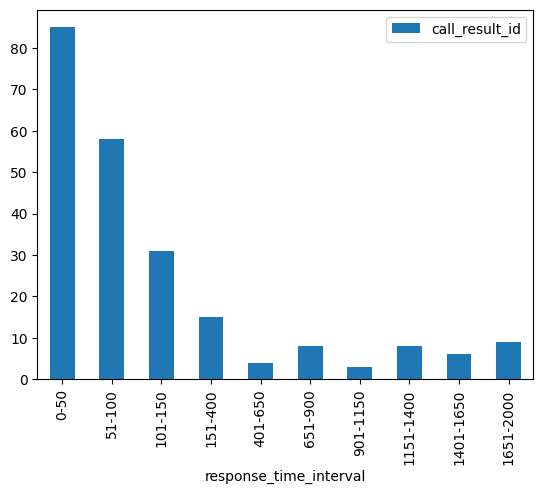

In [72]:
pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['response_time_interval'],sort=True).sum()).plot(kind='bar')


C:\Users\zeyne\AppData\Local\Temp\ipykernel_20732\2054263676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pd.DataFrame(telesales['call_result_id'].groupby(telesales['response_time_interval'],sort=True).sum()).plot(kind='bar')


<Axes: xlabel='response_time_interval'>

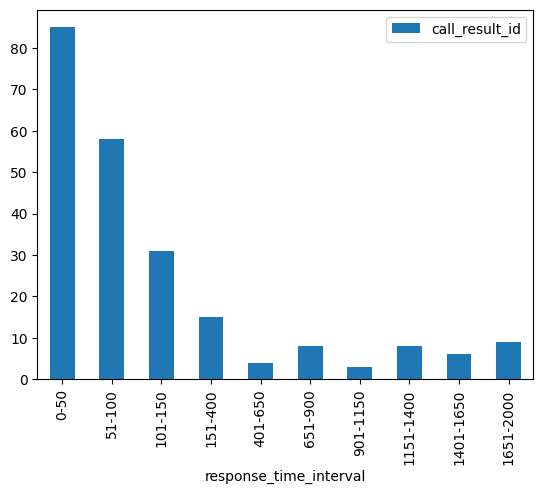

In [73]:
pd.DataFrame(telesales['call_result_id'].groupby(telesales['response_time_interval'],sort=True).sum()).plot(kind='bar')


In [74]:
telesales.shape

(1031, 22)

##### Hypothesis 5 : Employee Performance Varies Significantly by Call Type

Let's compare hot and cold call type results

In [117]:
hot_calls

,call_id,call_type,response_time,call_result_id,employee_name,hired_date,age_interval,gender_name,response_time_interval
3,2663,Hot,1039.0,1,Rashad Huseynli,2018-06-06,41-50,Woman,1001-1250
5,3008,Hot,35.0,1,Elchin Asgarov,2019-02-05,15-30,Man,0-50
11,2622,Hot,87.0,0,Orkhan Asgarov,2017-12-18,41-50,Man,51-100
12,2657,Hot,17.0,1,Fidan Mammadli,2018-01-12,41-50,Man,0-50
20,2908,Hot,1132.0,0,Orkhan Asgarov,2017-12-18,41-50,Woman,1001-1250
...,...,...,...,...,...,...,...,...,...
1094,3021,Hot,1215.0,0,Rufat Huseynov,2024-10-01,41-50,Man,1001-1250
1095,2262,Hot,19.0,1,Orkhan Asgarov,2017-12-18,41-50,Woman,0-50
1097,2835,Hot,56.0,1,Fuad Aliyev,2017-07-15,41-50,Man,51-100
1099,2698,Hot,691.0,1,Emin Ahmedov,2022-09-08,41-50,Woman,501-750


In [118]:
cold_calls = telesales.loc[telesales['call_type']=='Cold'][['call_id','call_type','call_result_id','employee_name','hired_date','age_interval','gender_name']]
cold_calls

,call_id,call_type,call_result_id,employee_name,hired_date,age_interval,gender_name
0,2406,Cold,0,Elmir Mustafayev,2018-01-05,31-40,Man
1,2892,Cold,0,Rashad Huseynli,2018-06-06,31-40,Man
2,2788,Cold,1,Fuad Aliyev,2017-07-15,41-50,Man
4,2498,Cold,0,Fidan Mammadli,2018-01-12,41-50,Woman
6,2615,Cold,0,Orkhan Asgarov,2017-12-18,31-40,Man
...,...,...,...,...,...,...,...
1090,2565,Cold,0,Fidan Mammadli,2018-01-12,31-40,Man
1092,2355,Cold,0,Rashad Huseynli,2018-06-06,41-50,Man
1093,2389,Cold,0,Orkhan Asgarov,2017-12-18,31-40,Woman
1096,2079,Cold,0,Fuad Aliyev,2017-07-15,41-50,Man


<Axes: xlabel='employee_name'>

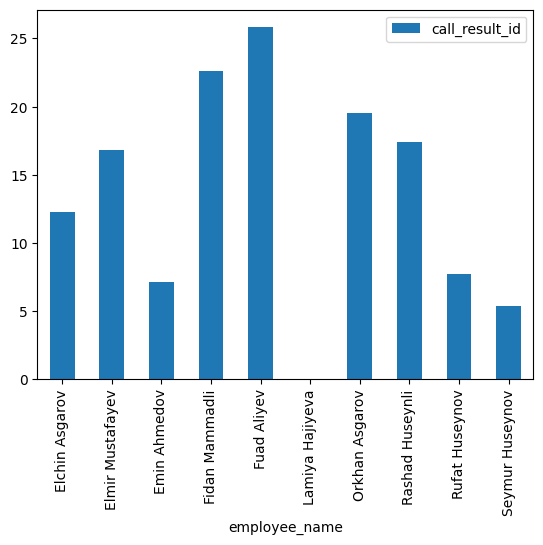

In [119]:
pd.DataFrame(cold_calls['call_result_id'].groupby(cold_calls['employee_name']).mean()*100).plot(kind='bar')

<Axes: xlabel='employee_name'>

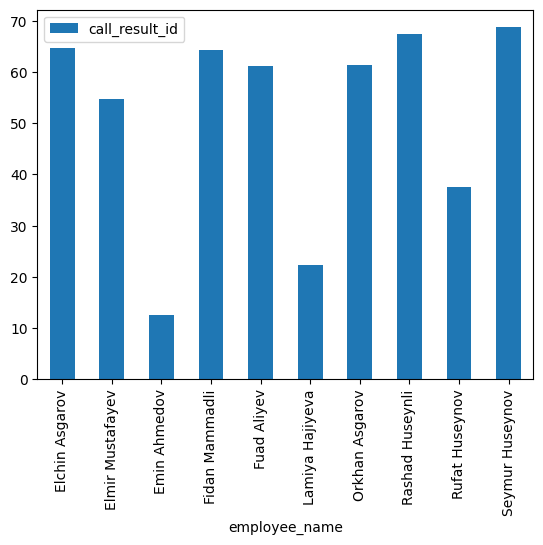

In [120]:
pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['employee_name']).mean() * 100).plot(kind='bar')

There is an interesting result! Although **Seymur Huseynov** has the highest conversion rate for hot calls, he does not perform as well with cold calls.

Also **Lamiya Hajiyeva** has no succes with cold calls and has limited success with hot calls.

**We will examine whether employees with shorter response times are more successful.**

In [121]:
emp_succes = pd.DataFrame(hot_calls['call_result_id'].groupby(hot_calls['employee_name']).mean() * 100).reset_index()
emp_succes

,employee_name,call_result_id
0,Elchin Asgarov,64.705882
1,Elmir Mustafayev,54.687500
2,Emin Ahmedov,12.500000
3,Fidan Mammadli,64.285714
4,Fuad Aliyev,61.111111
5,Lamiya Hajiyeva,22.222222
6,Orkhan Asgarov,61.290323
7,Rashad Huseynli,67.391304
8,Rufat Huseynov,37.500000
9,Seymur Huseynov,68.750000


In [101]:
hot_calls2 = hot_calls.merge(emp_succes, on='employee_name', suffixes=['0','succes_rate'])
hot_calls2

,call_id,call_type,response_time,call_result_id0,employee_name,hired_date,age_interval,gender_name,response_time_interval,call_result_idsucces_rate
0,2663,Hot,1039.0,1,Rashad Huseynli,2018-06-06,41-50,Woman,1001-1250,67.391304
1,3008,Hot,35.0,1,Elchin Asgarov,2019-02-05,15-30,Man,0-50,64.705882
2,2622,Hot,87.0,0,Orkhan Asgarov,2017-12-18,41-50,Man,51-100,61.290323
3,2657,Hot,17.0,1,Fidan Mammadli,2018-01-12,41-50,Man,0-50,64.285714
4,2908,Hot,1132.0,0,Orkhan Asgarov,2017-12-18,41-50,Woman,1001-1250,61.290323
...,...,...,...,...,...,...,...,...,...,...
405,3021,Hot,1215.0,0,Rufat Huseynov,2024-10-01,41-50,Man,1001-1250,37.500000
406,2262,Hot,19.0,1,Orkhan Asgarov,2017-12-18,41-50,Woman,0-50,61.290323
407,2835,Hot,56.0,1,Fuad Aliyev,2017-07-15,41-50,Man,51-100,61.111111
408,2698,Hot,691.0,1,Emin Ahmedov,2022-09-08,41-50,Woman,501-750,12.500000


In [105]:
employee_ttest = hot_calls2[['employee_name','response_time','hired_date']]
employee_ttest['succes'] = hot_calls2['call_result_idsucces_rate'].apply(lambda x : 1 if x > 50 else 0)
employee_ttest

C:\Users\zeyne\AppData\Local\Temp\ipykernel_16276\2628929470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_ttest['succes'] = hot_calls2['call_result_idsucces_rate'].apply(lambda x : 1 if x > 50 else 0)


,employee_name,response_time,hired_date,succes
0,Rashad Huseynli,1039.0,2018-06-06,1
1,Elchin Asgarov,35.0,2019-02-05,1
2,Orkhan Asgarov,87.0,2017-12-18,1
3,Fidan Mammadli,17.0,2018-01-12,1
4,Orkhan Asgarov,1132.0,2017-12-18,1
...,...,...,...,...
405,Rufat Huseynov,1215.0,2024-10-01,0
406,Orkhan Asgarov,19.0,2017-12-18,1
407,Fuad Aliyev,56.0,2017-07-15,1
408,Emin Ahmedov,691.0,2022-09-08,0


In [106]:
emp_succes

,employee_name,call_result_id
0,Elchin Asgarov,64.705882
1,Elmir Mustafayev,54.687500
2,Emin Ahmedov,12.500000
3,Fidan Mammadli,64.285714
4,Fuad Aliyev,61.111111
5,Lamiya Hajiyeva,22.222222
6,Orkhan Asgarov,61.290323
7,Rashad Huseynli,67.391304
8,Rufat Huseynov,37.500000
9,Seymur Huseynov,68.750000


In [107]:
employee_ttest = employee_ttest.merge(emp_succes, on='employee_name')

In [108]:
employee_ttest

,employee_name,response_time,hired_date,succes,call_result_id
0,Rashad Huseynli,1039.0,2018-06-06,1,67.391304
1,Elchin Asgarov,35.0,2019-02-05,1,64.705882
2,Orkhan Asgarov,87.0,2017-12-18,1,61.290323
3,Fidan Mammadli,17.0,2018-01-12,1,64.285714
4,Orkhan Asgarov,1132.0,2017-12-18,1,61.290323
...,...,...,...,...,...
405,Rufat Huseynov,1215.0,2024-10-01,0,37.500000
406,Orkhan Asgarov,19.0,2017-12-18,1,61.290323
407,Fuad Aliyev,56.0,2017-07-15,1,61.111111
408,Emin Ahmedov,691.0,2022-09-08,0,12.500000


In [110]:
employee_ttest['longer_response_time'] = employee_ttest['response_time'].apply(lambda x : 1 if x > employee_ttest['response_time'].median() else 0)
employee_ttest

,employee_name,response_time,hired_date,succes,call_result_id,longer_response_time
0,Rashad Huseynli,1039.0,2018-06-06,1,67.391304,1
1,Elchin Asgarov,35.0,2019-02-05,1,64.705882,0
2,Orkhan Asgarov,87.0,2017-12-18,1,61.290323,0
3,Fidan Mammadli,17.0,2018-01-12,1,64.285714,0
4,Orkhan Asgarov,1132.0,2017-12-18,1,61.290323,1
...,...,...,...,...,...,...
405,Rufat Huseynov,1215.0,2024-10-01,0,37.500000,1
406,Orkhan Asgarov,19.0,2017-12-18,1,61.290323,0
407,Fuad Aliyev,56.0,2017-07-15,1,61.111111,0
408,Emin Ahmedov,691.0,2022-09-08,0,12.500000,1


<Axes: xlabel='longer_response_time'>

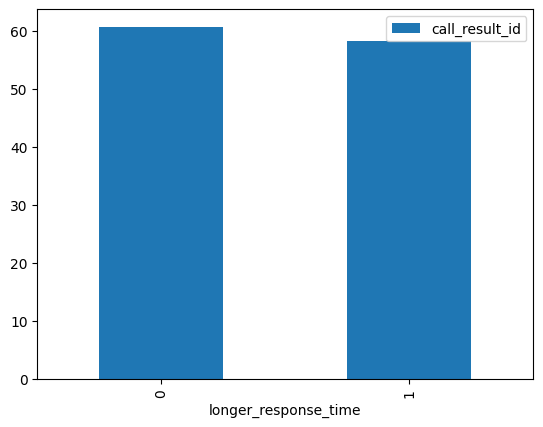

In [111]:
pd.DataFrame(employee_ttest['call_result_id'].groupby(employee_ttest['longer_response_time']).mean()).plot(kind='bar')

Bu qrafikdən görünür ki, zənglərə gec və tez cavab verən işçilərimizin uğur faizi arasında çox az bir fərq var. Bu fərqin həqiqətən də əhəmiyyətli olduğunu, yəni təsadüf nəticəsində yaranmadığını test etdik

In [113]:
stats.ttest_ind(employee_ttest[employee_ttest['longer_response_time']==0].call_result_id, employee_ttest[employee_ttest['longer_response_time']==1].call_result_id, equal_var=False,alternative='greater').pvalue

np.float64(0.00698562765102905)

P-value bu müşahidə etdiyimiz fərqin nə qədər əhəmiyyətli olduğunu ölçməyə yarayır. Əgər 0.05-dən kiçik alınırsa, onda fərq əhəmiyyətlidir. Bizdə də p-value 0.006 alınıb, 0.05-dən kiçikdir. Buradan belə bir nəticə çıxır ki, zənglərə gec cavab verən işçilərimizin uğur faizi zəngə tez cavab verənlərinkindən əhəmiyyətli dərəcədə aşağıdır.

Permutation test

In [66]:
import random

In [115]:
mean_a = employee_ttest[employee_ttest.longer_response_time == 1].call_result_id.mean()
mean_b = employee_ttest[employee_ttest.longer_response_time == 0].call_result_id.mean()
print(mean_b - mean_a)

2.4687732081433538


In [68]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
nA = employee_ttest[employee_ttest.longer_response_time == 1].shape[0]
nB = employee_ttest[employee_ttest.longer_response_time == 0].shape[0]

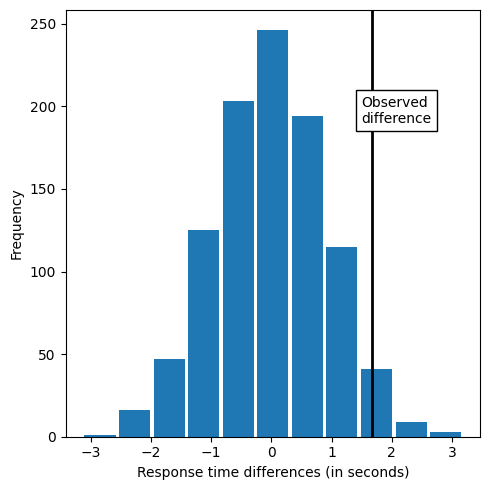

In [69]:
random.seed(1)
perm_diffs = [perm_fun(employee_ttest.call_result, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(1.5, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Response time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [70]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))

0.031


P value is less than 0.05. It means that employees with shorter response time have significantly more success rate than employees with longer response time

**Average response time of employees**

<Axes: xlabel='employee_name'>

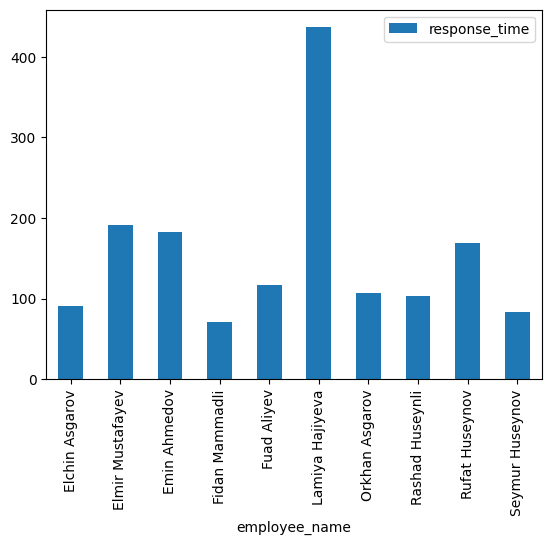

In [71]:
pd.DataFrame(hot_calls['response_time'].groupby(hot_calls['employee_name']).median()).plot(kind='bar')

**Call success rate can also change due to employees' job experience.** We assume that employees with more job experience have higher conversion(success) rate. Now we will test this hypothesis.

**Test for hot calls**

In [72]:
employee_ttest

,employee_name,response_time,hired_date,succes,call_result,longer_response_time
0,Elchin Asgarov,91.0,2019-02-05,1,63.636364,0
1,Emin Ahmedov,119.0,2022-09-08,0,12.500000,1
2,Rashad Huseynli,683.0,2018-06-06,1,65.116279,1
3,Orkhan Asgarov,109.0,2017-12-18,1,60.240964,1
4,Rashad Huseynli,1010.0,2018-06-06,1,65.116279,1
...,...,...,...,...,...,...
379,Fuad Aliyev,753.0,2017-07-15,1,61.627907,1
380,Orkhan Asgarov,50.0,2017-12-18,1,60.240964,0
381,Fuad Aliyev,1226.0,2017-07-15,1,61.627907,1
382,Orkhan Asgarov,11.0,2017-12-18,1,60.240964,0


In [73]:
employee_ttest['employee_experience'] = 2024 - employee_ttest['hired_date'].apply(lambda x:x.year)
employee_ttest

,employee_name,response_time,hired_date,succes,call_result,longer_response_time,employee_experience
0,Elchin Asgarov,91.0,2019-02-05,1,63.636364,0,5
1,Emin Ahmedov,119.0,2022-09-08,0,12.500000,1,2
2,Rashad Huseynli,683.0,2018-06-06,1,65.116279,1,6
3,Orkhan Asgarov,109.0,2017-12-18,1,60.240964,1,7
4,Rashad Huseynli,1010.0,2018-06-06,1,65.116279,1,6
...,...,...,...,...,...,...,...
379,Fuad Aliyev,753.0,2017-07-15,1,61.627907,1,7
380,Orkhan Asgarov,50.0,2017-12-18,1,60.240964,0,7
381,Fuad Aliyev,1226.0,2017-07-15,1,61.627907,1,7
382,Orkhan Asgarov,11.0,2017-12-18,1,60.240964,0,7


In [74]:
employee_ttest['more_experience'] = employee_ttest['employee_experience'].apply( lambda x: 1 if x >= employee_ttest['employee_experience'].mean() else 0)

In [75]:
employee_ttest

,employee_name,response_time,hired_date,succes,call_result,longer_response_time,employee_experience,more_experience
0,Elchin Asgarov,91.0,2019-02-05,1,63.636364,0,5,0
1,Emin Ahmedov,119.0,2022-09-08,0,12.500000,1,2,0
2,Rashad Huseynli,683.0,2018-06-06,1,65.116279,1,6,1
3,Orkhan Asgarov,109.0,2017-12-18,1,60.240964,1,7,1
4,Rashad Huseynli,1010.0,2018-06-06,1,65.116279,1,6,1
...,...,...,...,...,...,...,...,...
379,Fuad Aliyev,753.0,2017-07-15,1,61.627907,1,7,1
380,Orkhan Asgarov,50.0,2017-12-18,1,60.240964,0,7,1
381,Fuad Aliyev,1226.0,2017-07-15,1,61.627907,1,7,1
382,Orkhan Asgarov,11.0,2017-12-18,1,60.240964,0,7,1


<Axes: xlabel='more_experience'>

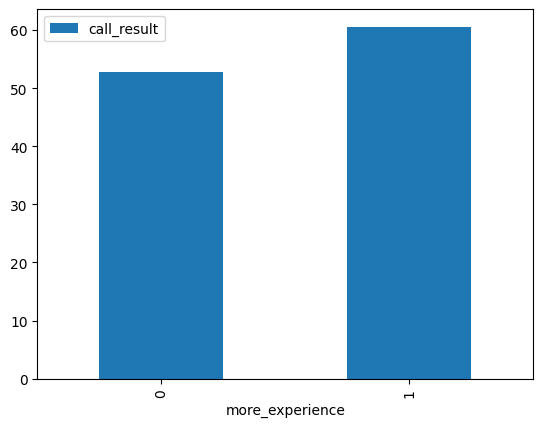

In [76]:
pd.DataFrame(employee_ttest['call_result'].groupby(employee_ttest['more_experience']).mean()).plot(kind='bar')

In [77]:
pvalue = stats.ttest_ind(employee_ttest[employee_ttest['more_experience']==1].call_result, employee_ttest[employee_ttest['employee_experience']==0].call_result, equal_var=False,alternative='greater').pvalue

c:\Users\zeyne\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [78]:
print(f'pvalue:{pvalue:.15f}')

pvalue:0.000000000000000


P-value is less than 0.05

Permutation test for the relationship between job experience and call rate

In [79]:
mean_a = employee_ttest[employee_ttest.more_experience == 0].call_result.mean()
mean_b = employee_ttest[employee_ttest.more_experience == 1].call_result.mean()
print(mean_b - mean_a)

7.799145299145309


In [80]:
nA = employee_ttest[employee_ttest.more_experience == 0].shape[0]
nB = employee_ttest[employee_ttest.more_experience == 1].shape[0]

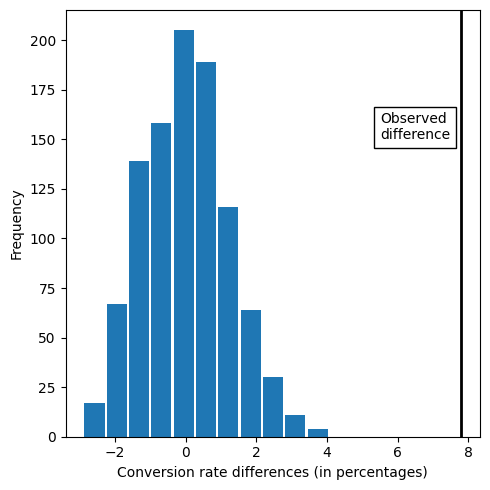

In [81]:
random.seed(1)
perm_diffs = [perm_fun(employee_ttest.call_result, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(5.5, 150, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate differences (in percentages)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

p value is less than 0.05. We can say that employees with more job experience have higher call success rate than employees with less job experience in hot calls

**Cold Calls**

In [86]:
cold_calls['experience'] = 2024 - cold_calls['hired_date'].apply(lambda x:x.year)
cold_calls['more_experience'] = cold_calls['experience'].apply(lambda x : 1 if x > cold_calls['experience'].mean() else 0)
cold_calls

,call_id,call_type,call_result,employee_name,hired_date,experience,more_experience
0,2001,Cold,0,Rufat Huseynov,2024-10-01,0,0
1,2002,Cold,0,Fuad Aliyev,2017-07-15,7,1
2,2003,Cold,0,Fidan Mammadli,2018-01-12,6,0
3,2004,Cold,0,Rashad Huseynli,2018-06-06,6,0
7,2008,Cold,0,Rashad Huseynli,2018-06-06,6,0
...,...,...,...,...,...,...,...
1017,3017,Cold,0,Orkhan Asgarov,2017-12-18,7,1
1018,3018,Cold,0,Orkhan Asgarov,2017-12-18,7,1
1020,3020,Cold,1,Orkhan Asgarov,2017-12-18,7,1
1025,3025,Cold,0,Rashad Huseynli,2018-06-06,6,0


In [94]:
emp_call_succes_cold = pd.DataFrame(cold_calls['call_result'].groupby(cold_calls['employee_name']).mean()*100).reset_index()
emp_call_succes_cold.rename({'call_result':'call_success'},axis=1,inplace=True)

In [96]:
cold_calls = cold_calls.merge(emp_call_succes_cold, on='employee_name')

In [97]:
cold_calls

,call_id,call_type,call_result,employee_name,hired_date,experience,more_experience,call_success
0,2001,Cold,0,Rufat Huseynov,2024-10-01,0,0,7.692308
1,2002,Cold,0,Fuad Aliyev,2017-07-15,7,1,26.206897
2,2003,Cold,0,Fidan Mammadli,2018-01-12,6,0,21.794872
3,2004,Cold,0,Rashad Huseynli,2018-06-06,6,0,17.460317
4,2008,Cold,0,Rashad Huseynli,2018-06-06,6,0,17.460317
...,...,...,...,...,...,...,...,...
643,3017,Cold,0,Orkhan Asgarov,2017-12-18,7,1,19.867550
644,3018,Cold,0,Orkhan Asgarov,2017-12-18,7,1,19.867550
645,3020,Cold,1,Orkhan Asgarov,2017-12-18,7,1,19.867550
646,3025,Cold,0,Rashad Huseynli,2018-06-06,6,0,17.460317


In [102]:
pvalue = stats.ttest_ind(cold_calls[cold_calls['more_experience']==1].call_success, cold_calls[cold_calls['more_experience']==0].call_success, alternative='greater').pvalue
print(f'pvalue : {pvalue:.4f}')

pvalue : 0.0000


In [98]:
cold_calls['call_success'].groupby(cold_calls['more_experience']).mean()

more_experience
0    15.340909
1    22.972973
Name: call_success, dtype: float64

In [75]:
telesales.to_csv('telesales_final.csv',index=False)